# 1. Functions
- what is a function and how we can describe it?
  - We can think of functions as boxes that take in numbers as input and produce numbers as output, like minifactories that have their own internal rules for what happens to the input  
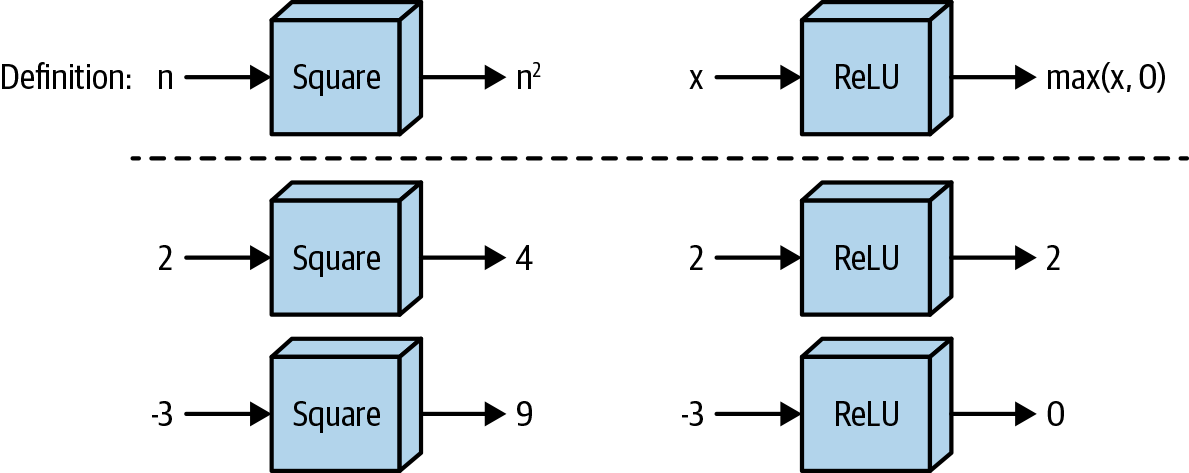

# Derivatives

- The derivative of a function at a point is the “rate of change” of the output of the function with respect to its input at that point

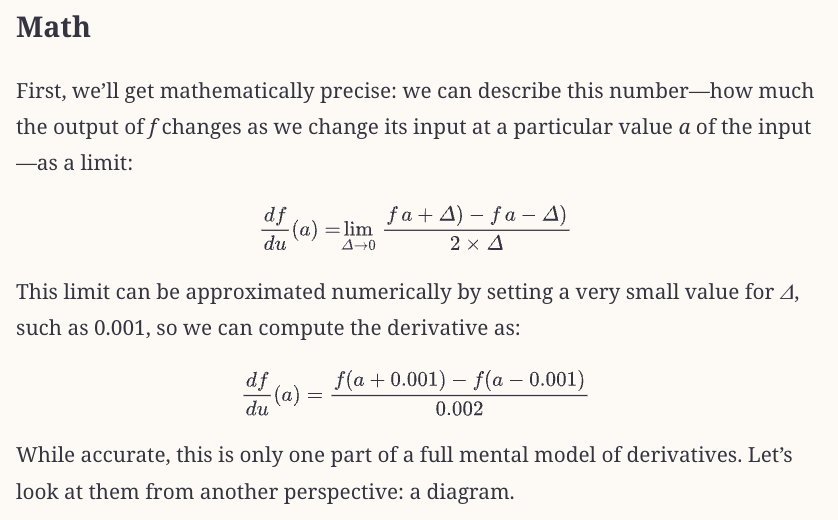

If we simply draw a tangent line to the Cartesian representation of the function f, the derivative of f at a point a is just the slope of this line at a.

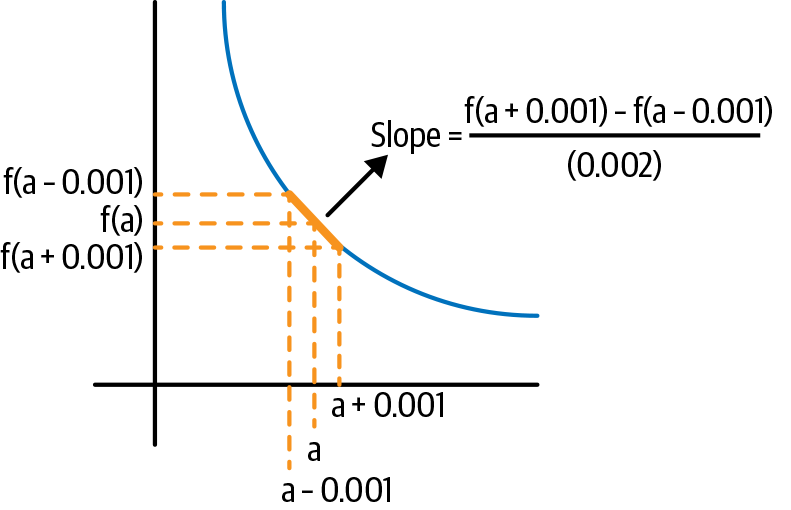

In [ ]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input: ndarray,
          delta: float = 0.001) -> ndarray:

  '''
  Evaluates the derivative of a function "func" at every element in the
  "input_" array.
  '''

  return (func(input + delta) - func(input - delta)) / (2 * delta)

# Nested Functions

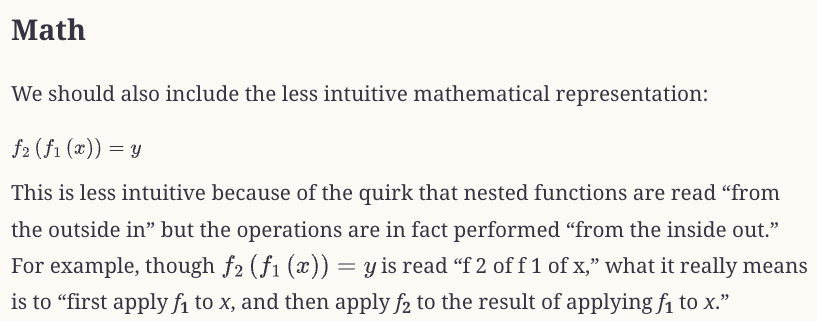

x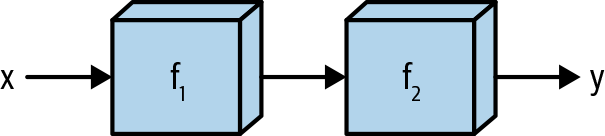

In [ ]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

## Then we’ll define how data goes through a chain, first of length 2:

def chain_length_2(chain: Chain, a: ndarray) -> ndarray:
  '''
  Evaluates two functions in a row, in a "Chain".
  '''
  assert len(chain) == 2,
  "Length of input 'chain' should be 2"

  f1 = chain[0]
  f2 = chain[1]

  return f2(f1(x))

# The Chain Rule

The chain rule is a mathematical theorem that lets us compute derivatives of composite functions. Deep learning models are, mathematically, composite functions, and reasoning about their derivatives is essential to training them:

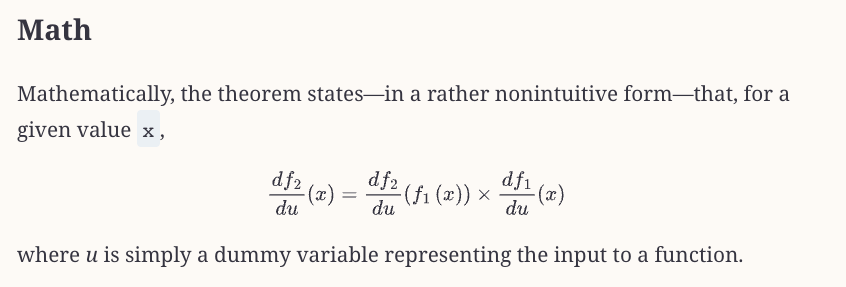

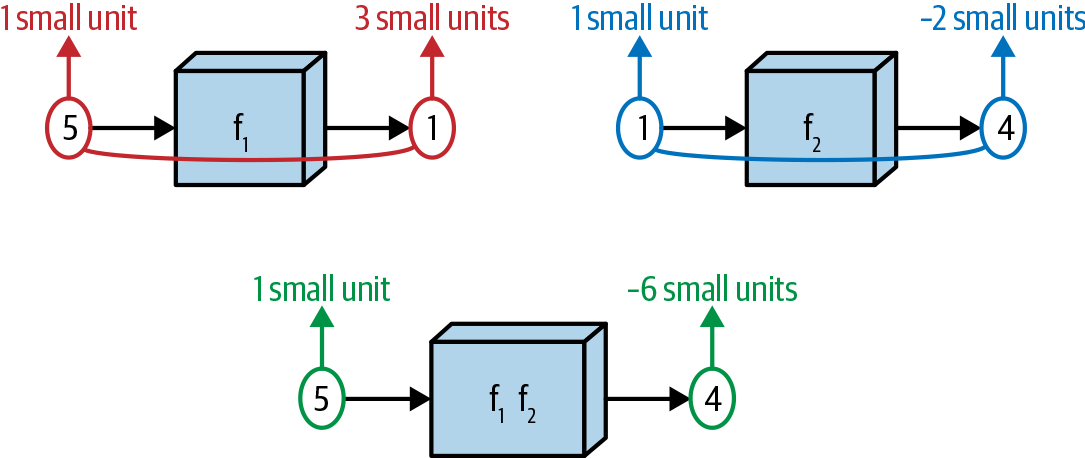

In [ ]:
def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2,
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1,
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

In [ ]:
PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(chain_1, PLOT_RANGE)
plot_chain_deriv(chain_1, PLOT_RANGE)

plot_chain(chain_2, PLOT_RANGE)
plot_chain_deriv(chain_2, PLOT_RANGE)

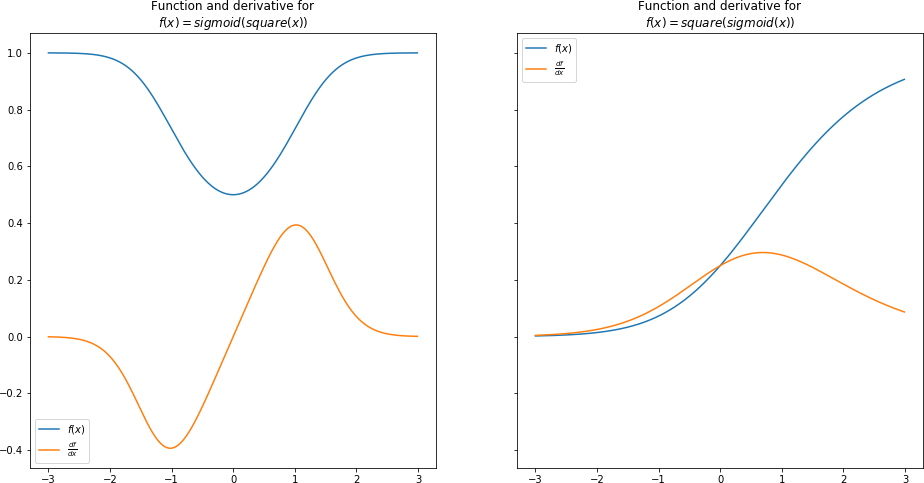

The chain rule seems to be working. When the functions are upward-sloping, the derivative is positive; when they are flat, the derivative is zero; and when they are downward-sloping, the derivative is negative

# Functions with Multiple Inputs



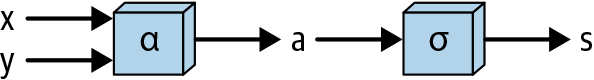

In [ ]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Function with multiple inputs and addition, forward pass.
    '''
    assert x.shape == y.shape

    a = x + y
    return sigma(a)

## Derivatives of Functions with Multiple Inputs
- Compute the derivative of each constituent function “going backward” through the computational graph and then multiply the results together to get the total derivative.

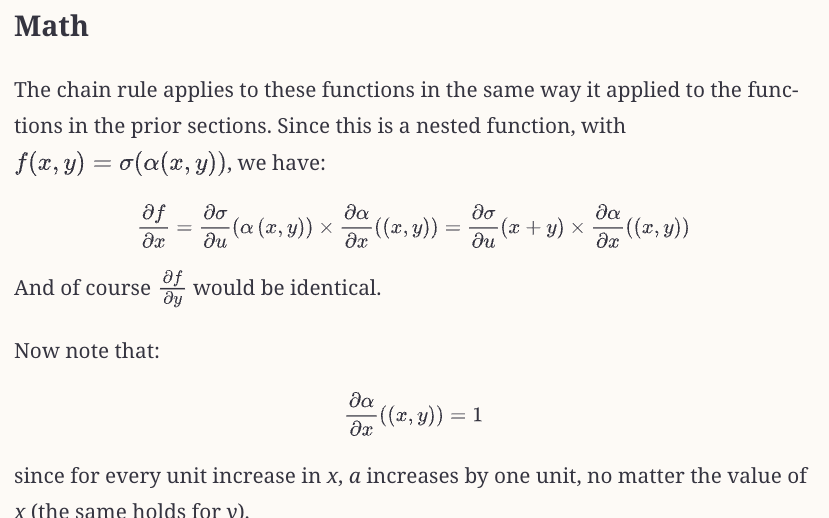

In [ ]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs.
    '''

    # compute 'forward pass'
    a = x + y

    # compute derivatives
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady



# Functions with Multiple Vector Inputs

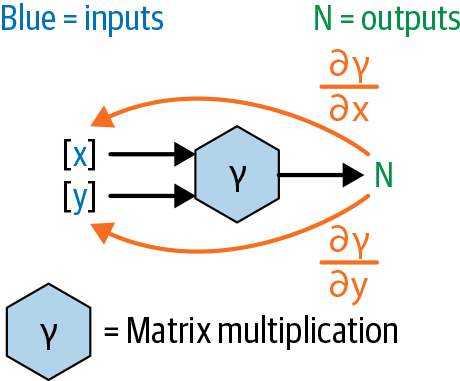

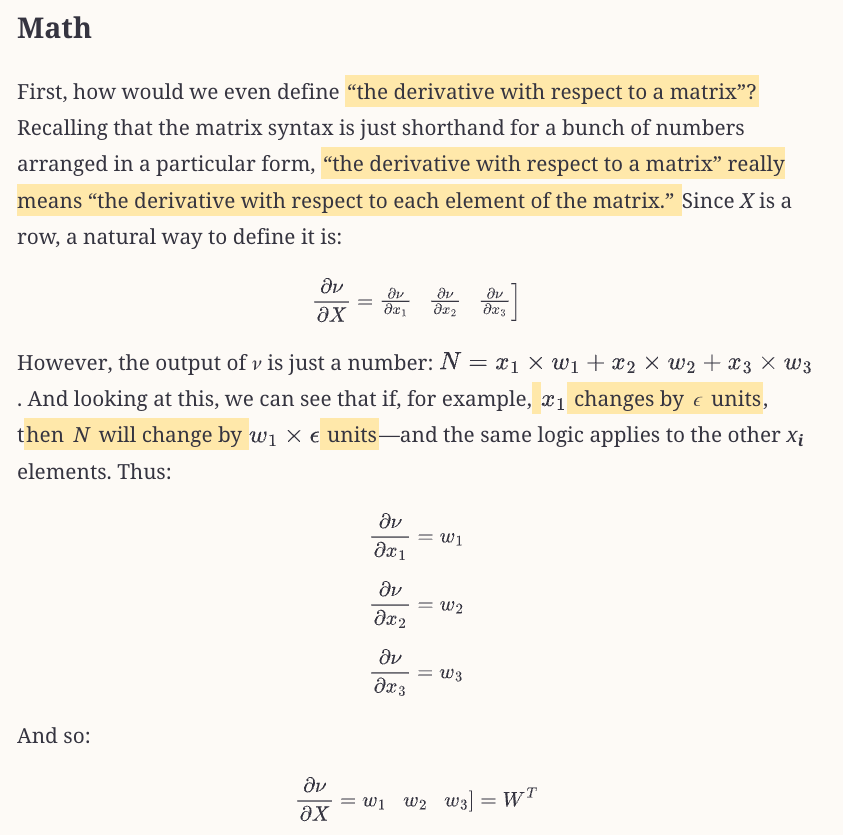

In [ ]:
def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    Computes the backward pass of a matrix multiplication
    with respect to the first argument.
    '''

    # backward pass
    dNdX = np.transpose(W, (1, 0))

    return dNdX

# The dNdX quantity computed here represents the
 # partial derivative of each element of X with respect to the sum of the output N

## Vector Functions and Their Derivatives: One Step Further

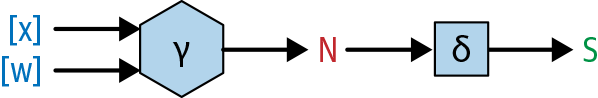

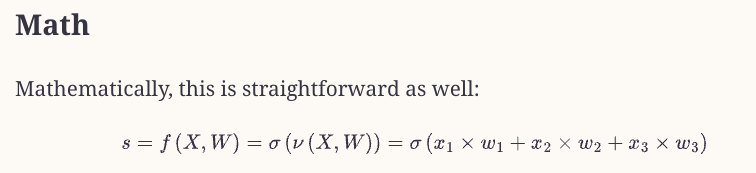

In [ ]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
  '''
  Computes the forward pass of a function
  involving matrix multiplication, one extra function.
  '''

  assert X.shape[1] == W.shape[0]

  # matrix multiplication
  N = np.dot(X, W)

  # feeding the output of the matrix multiplication through sigma
  S = sigma(N)

  return S

## Vector Functions and Their Derivatives: The Backward Pass

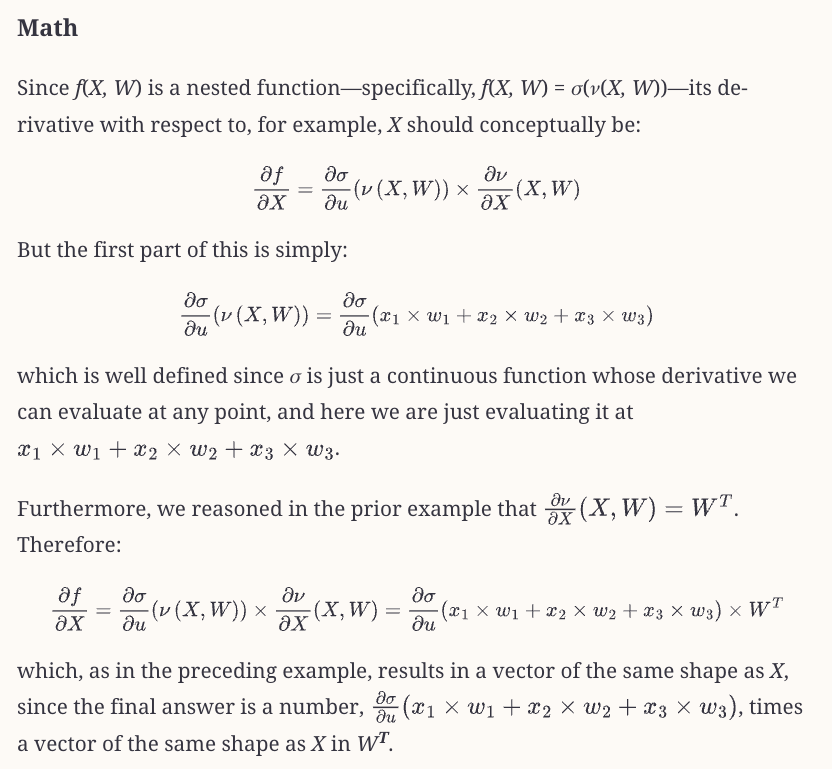

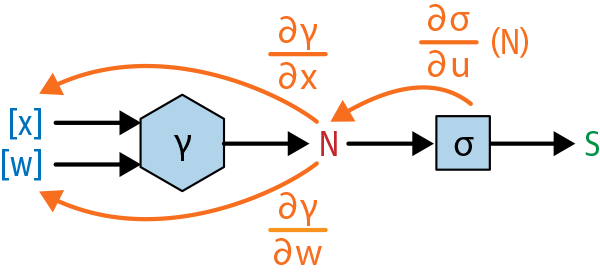

In [ ]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

# Computational Graph with Two 2D Matrix Inputs

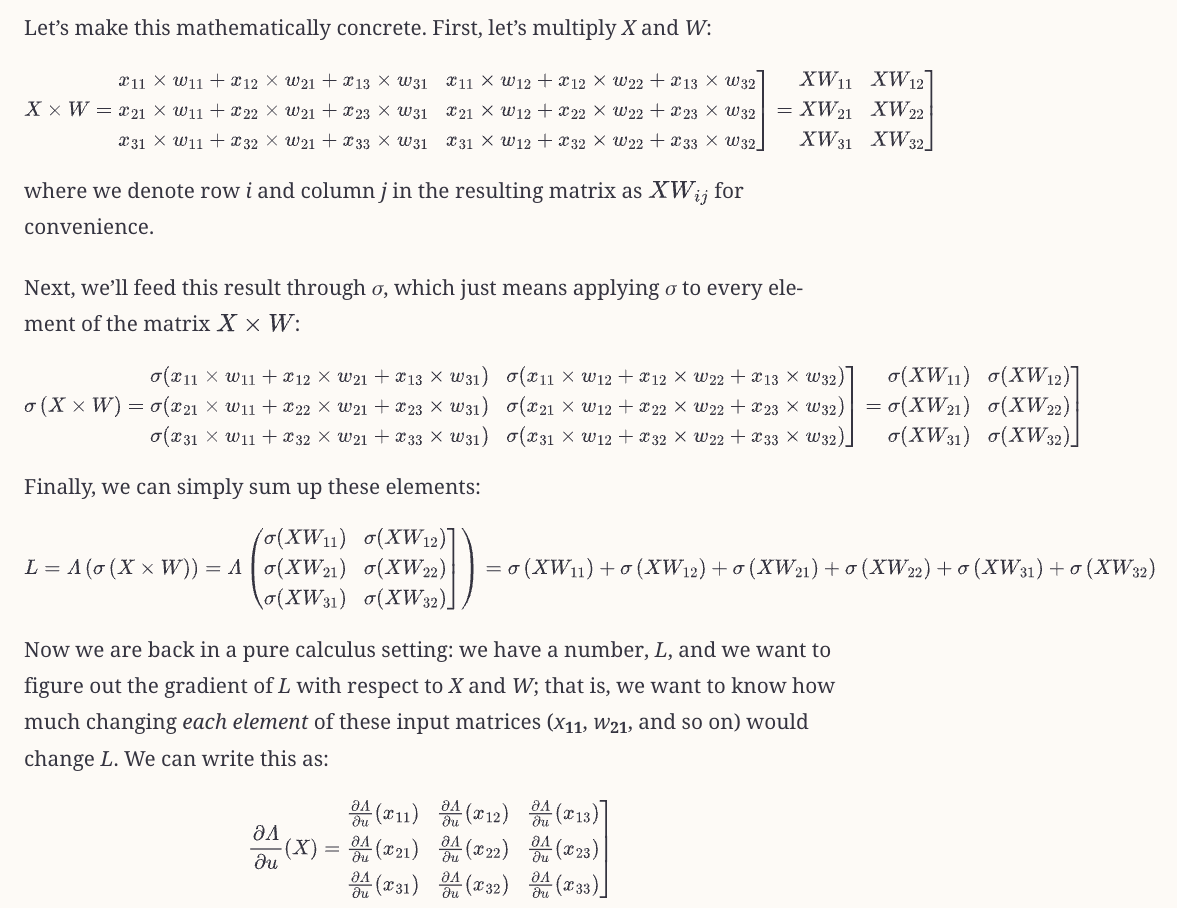

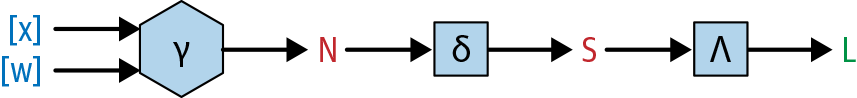

In [ ]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

## The Fun Part: The Backward Pass

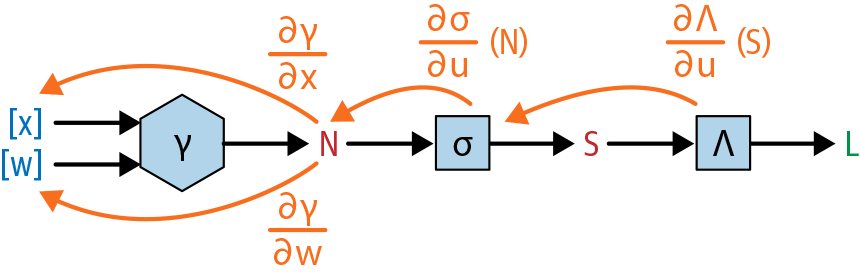

In [ ]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # note: I'll refer to the derivatives by their quantities here,
    # unlike the math, where we referred to their function names

    # dLdS - just 1s
    dLdS = np.ones_like(S)

    # dSdN
    dSdN = deriv(sigma, N)

    # dLdN
    dLdN = dLdS * dSdN

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

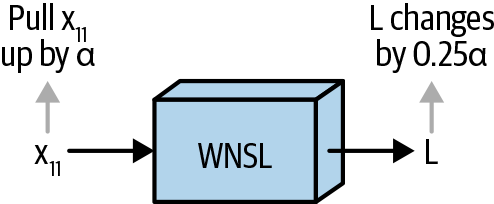